In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches

In [2]:
# Importing dataset and converting to dataframe
data = pd.read_csv('heart.csv', header=None)
df = pd.DataFrame(data)

In [3]:
y = df.iloc[:, 13]
y = y - 1

In [4]:
def chol_age():
    x = df.iloc[:, 0:5]
    x = x.drop(x.columns[1:4], axis=1)
    chol_avgs = x.groupby(0, sort=True).mean()
    ages = chol_avgs[4].index.values
    avgs = chol_avgs[4].values
    plt.plot(ages, avgs, 'g-')
    plt.title('Variation of Cholesterol Levels with Age')
    plt.xlabel('Age (years)')
    plt.ylabel('Serum Cholesterol in mg/dl')

In [5]:
def heart_atrack_heart_rate_bp():
    x = df.iloc[:, 0:14]
    x[14] = np.round(df[3], -1)

    x_dis = x[x[13] == 2]
    bp_set_dis = x_dis.groupby(14, sort=True)
    nums_dis = bp_set_dis.count()[0].index.values
    bps_dis = bp_set_dis.count()[0].values
    bar2 = plt.bar(nums_dis + 2, bps_dis, color='r', width=2)

    x_nor = x[x[13] == 1]
    bp_set_nor = x_nor.groupby(14, sort=True)
    nums_nor = bp_set_nor.count()[0].index.values
    bps_nor = bp_set_nor.count()[0].values
    bar1 = plt.bar(nums_nor, bps_nor, color='g', width=2)

    plt.title('Resting Blood Pressure as Heart Risk Indicator')
    plt.xlabel('Resting Blood Pressure Bucket')
    plt.ylabel('Number of Patients')

    plt.legend((bar1[0], bar2[0]), ('Safe', 'At Risk'))

In [6]:
def pie_chart_chest_pain():
    x = df.iloc[:, 0:3]
    sets = x.groupby(2).count()
    fin_lab = ['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic']
    values = sets[0].values
    plt.pie(values, labels=fin_lab, colors=['yellowgreen', 'gold', 'lightskyblue', 'lightcoral'],
            explode=[0, 0.2, 0, 0], shadow=True, autopct='%1.1f%%', startangle=90)
    plt.title('Chest Pain Types')

In [7]:
def scatter_chart():
    x = df.iloc[:, 0:13]
    sc = plt.scatter(x[7], x[4], c=y, cmap='summer')
    plt.title('Dataset Scatter')
    classes = ['Safe', 'At Risk']
    class_colours = ['g', 'y']
    recs = []
    for i in range(0, len(class_colours)):
        recs.append(mpatches.Rectangle((0, 0), 1, 1, fc=class_colours[i]))
    plt.legend(recs, classes)

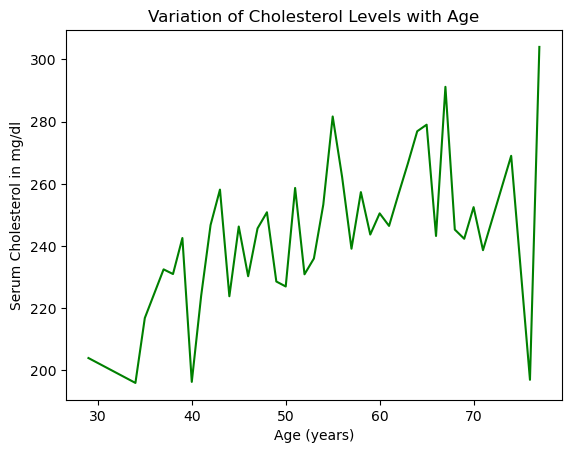

In [8]:
chol_age()
plt.show()

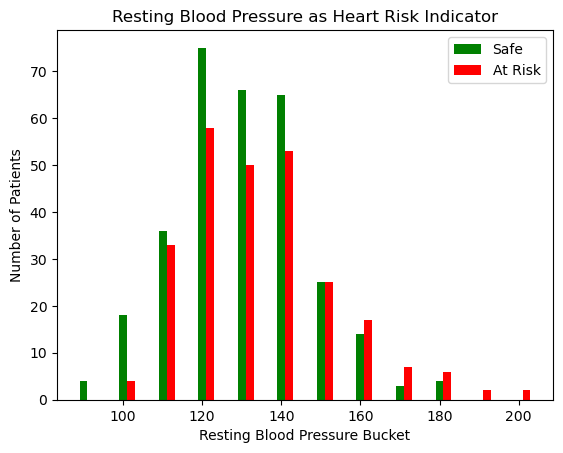

In [9]:
heart_atrack_heart_rate_bp()
plt.show()

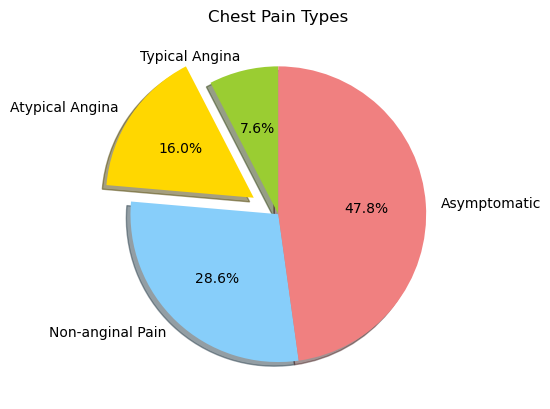

In [10]:
pie_chart_chest_pain()
plt.show()

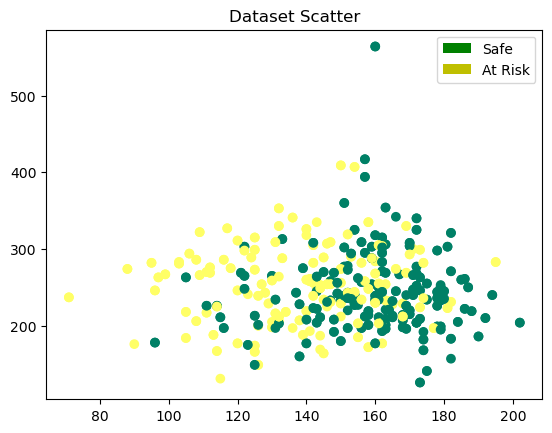

In [11]:
scatter_chart()
plt.show()